<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/unit_2_sprint_3_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip

--2019-05-08 18:45:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.1’

bank-additional.zip 100%[===================>] 434.15K  1.29MB/s    in 0.3s    

2019-05-08 18:45:57 (1.29 MB/s) - ‘bank-additional.zip.1’ saved [444572/444572]

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-additional/.DS_Store  
replace __MACOSX/bank-additional/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  


In [0]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [20]:
# This code comes from our previous notebook

# Imports
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load data
bank = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Assign to X, y
X = bank.drop(columns='y')
y = bank['y'] == 'yes'

# Drop leaky feature
X = X.drop(columns='duration')

# Split Train, Test
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.2, random_state=42, stratify=y)
class_weight='balanced'
# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000,class_weight=class_weight)
)
y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:,1]

from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.50
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:,1]
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred))

cm=pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

cm

              precision    recall  f1-score   support

       False       0.95      0.86      0.90     29240
        True       0.36      0.63      0.46      3710

   micro avg       0.83      0.83      0.83     32950
   macro avg       0.65      0.74      0.68     32950
weighted avg       0.88      0.83      0.85     32950



,Predicted Negative,Predicted Positive
Actual Negative,25103,4137
Actual Positive,1382,2328


In [0]:
#balanced means many more true positives, but also more false positives by a factor of 2 to 1
#so precision has gone down (66 to 36) but recall has up (23 to 63)


In [21]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [37]:
#X['contact'].value_counts()#X['education'].value_counts()#X['job'].value_counts(),X['marital'].value_counts()
#X['month'].value_counts()#X['day_of_week'].value_counts()
X['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [0]:
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:,1]

In [18]:
threshold = 0.5
y_pred = y_pred_proba >= threshold
correct = y_pred == y_train

labels = pd.DataFrame({'Ground Truth': y_train, 
                       'Predicted Probability': y_pred_proba, 
                       'Discrete Prediction': y_pred, 
                       'Correct Prediction?': correct})

labels.head(5)

,Ground Truth,Predicted Probability,Discrete Prediction,Correct Prediction?
29056,False,0.124833,False,True
25527,True,0.078980,False,False
23279,False,0.031633,False,True
12956,False,0.058740,False,True
27495,False,0.067301,False,True


In [17]:
y_pred_proba[:5]

array([0.12483281, 0.0789802 , 0.03163321, 0.05873952, 0.06730139])

In [7]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
       drop_invariant=False, handle_missing='value',
       handle_unknown='value', return_df=True, use_cat_names=True,
       verbose=0)), ('stan...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [0]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [0]:
#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8

#X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
 #                          n_redundant=0, n_repeated=0, n_classes=2, 
  #                         n_clusters_per_class=1, weights=weights, 
   #                        class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = None
#or try class_weight='balanced'

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0)

y_pred_proba=model.predict_proba(X_val)[:,1]
print('roc auc',roc_auc_score(y_val,y_pred_proba))

n  750  weight  (0.6, 0.4) class_sep 0.6 class weight None
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


roc auc 0.9765625 750 (0.6, 0.4) 0.6 None
----------------------------------------------------------------------
n  750  weight  (0.6, 0.4) class_sep 0.6 class weight balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


roc auc 0.9765625 750 (0.6, 0.4) 0.6 balanced
----------------------------------------------------------------------
n  750  weight  (0.6, 0.4) class_sep 0.7 class weight None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


roc auc 0.9921875 750 (0.6, 0.4) 0.7 None
----------------------------------------------------------------------
n  750  weight  (0.6, 0.4) class_sep 0.7 class weight balanced
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


roc auc 0.9921875 750 (0.6, 0.4) 0.7 balanced
----------------------------------------------------------------------
n  750  weight  (0.6, 0.4) class_sep 0.9 class weight None
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


roc auc 0.9973958333333334 750 (0.6, 0.4) 0.9 None
----------------------------------------------------------------------
n  750  weight  (0.6, 0.4) class_sep 0.9 class weight balanced
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


roc auc 0.9973958333333334 750 (0.6, 0.4) 0.9 balanced
----------------------------------------------------------------------
n  750  weight  (0.7, 0.3) class_sep 0.6 class weight None
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


roc auc 0.9765625 750 (0.7, 0.3) 0.6 None
----------------------------------------------------------------------
n  750  weight  (0.7, 0.3) class_sep 0.6 class weight balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


roc auc 0.9765625 750 (0.7, 0.3) 0.6 balanced
----------------------------------------------------------------------
n  750  weight  (0.7, 0.3) class_sep 0.7 class weight None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


roc auc 0.9921875 750 (0.7, 0.3) 0.7 None
----------------------------------------------------------------------
n  750  weight  (0.7, 0.3) class_sep 0.7 class weight balanced
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


roc auc 0.9921875 750 (0.7, 0.3) 0.7 balanced
----------------------------------------------------------------------
n  750  weight  (0.7, 0.3) class_sep 0.9 class weight None
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


roc auc 0.9973958333333334 750 (0.7, 0.3) 0.9 None
----------------------------------------------------------------------
n  750  weight  (0.7, 0.3) class_sep 0.9 class weight balanced
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


roc auc 0.9973958333333334 750 (0.7, 0.3) 0.9 balanced
----------------------------------------------------------------------
n  750  weight  (0.8, 0.2) class_sep 0.6 class weight None
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


roc auc 0.9765625 750 (0.8, 0.2) 0.6 None
----------------------------------------------------------------------
n  750  weight  (0.8, 0.2) class_sep 0.6 class weight balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


roc auc 0.9765625 750 (0.8, 0.2) 0.6 balanced
----------------------------------------------------------------------
n  750  weight  (0.8, 0.2) class_sep 0.7 class weight None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


roc auc 0.9921875 750 (0.8, 0.2) 0.7 None
----------------------------------------------------------------------
n  750  weight  (0.8, 0.2) class_sep 0.7 class weight balanced
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


roc auc 0.9921875 750 (0.8, 0.2) 0.7 balanced
----------------------------------------------------------------------
n  750  weight  (0.8, 0.2) class_sep 0.9 class weight None
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


roc auc 0.9973958333333334 750 (0.8, 0.2) 0.9 None
----------------------------------------------------------------------
n  750  weight  (0.8, 0.2) class_sep 0.9 class weight balanced
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


roc auc 0.9973958333333334 750 (0.8, 0.2) 0.9 balanced
----------------------------------------------------------------------
n  1500  weight  (0.6, 0.4) class_sep 0.6 class weight None
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


roc auc 0.9765625 1500 (0.6, 0.4) 0.6 None
----------------------------------------------------------------------
n  1500  weight  (0.6, 0.4) class_sep 0.6 class weight balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


roc auc 0.9765625 1500 (0.6, 0.4) 0.6 balanced
----------------------------------------------------------------------
n  1500  weight  (0.6, 0.4) class_sep 0.7 class weight None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


roc auc 0.9921875 1500 (0.6, 0.4) 0.7 None
----------------------------------------------------------------------
n  1500  weight  (0.6, 0.4) class_sep 0.7 class weight balanced
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


roc auc 0.9921875 1500 (0.6, 0.4) 0.7 balanced
----------------------------------------------------------------------
n  1500  weight  (0.6, 0.4) class_sep 0.9 class weight None
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 1500 (0.6, 0.4) 0.9 None
----------------------------------------------------------------------
n  1500  weight  (0.6, 0.4) class_sep 0.9 class weight balanced
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 1500 (0.6, 0.4) 0.9 balanced
----------------------------------------------------------------------
n  1500  weight  (0.7, 0.3) class_sep 0.6 class weight None
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 1500 (0.7, 0.3) 0.6 None
----------------------------------------------------------------------
n  1500  weight  (0.7, 0.3) class_sep 0.6 class weight balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 1500 (0.7, 0.3) 0.6 balanced
----------------------------------------------------------------------
n  1500  weight  (0.7, 0.3) class_sep 0.7 class weight None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 1500 (0.7, 0.3) 0.7 None
----------------------------------------------------------------------
n  1500  weight  (0.7, 0.3) class_sep 0.7 class weight balanced
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 1500 (0.7, 0.3) 0.7 balanced
----------------------------------------------------------------------
n  1500  weight  (0.7, 0.3) class_sep 0.9 class weight None
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 1500 (0.7, 0.3) 0.9 None
----------------------------------------------------------------------
n  1500  weight  (0.7, 0.3) class_sep 0.9 class weight balanced
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 1500 (0.7, 0.3) 0.9 balanced
----------------------------------------------------------------------
n  1500  weight  (0.8, 0.2) class_sep 0.6 class weight None
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 1500 (0.8, 0.2) 0.6 None
----------------------------------------------------------------------
n  1500  weight  (0.8, 0.2) class_sep 0.6 class weight balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 1500 (0.8, 0.2) 0.6 balanced
----------------------------------------------------------------------
n  1500  weight  (0.8, 0.2) class_sep 0.7 class weight None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 1500 (0.8, 0.2) 0.7 None
----------------------------------------------------------------------
n  1500  weight  (0.8, 0.2) class_sep 0.7 class weight balanced
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 1500 (0.8, 0.2) 0.7 balanced
----------------------------------------------------------------------
n  1500  weight  (0.8, 0.2) class_sep 0.9 class weight None
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 1500 (0.8, 0.2) 0.9 None
----------------------------------------------------------------------
n  1500  weight  (0.8, 0.2) class_sep 0.9 class weight balanced
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 1500 (0.8, 0.2) 0.9 balanced
----------------------------------------------------------------------
n  2000  weight  (0.6, 0.4) class_sep 0.6 class weight None
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 2000 (0.6, 0.4) 0.6 None
----------------------------------------------------------------------
n  2000  weight  (0.6, 0.4) class_sep 0.6 class weight balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 2000 (0.6, 0.4) 0.6 balanced
----------------------------------------------------------------------
n  2000  weight  (0.6, 0.4) class_sep 0.7 class weight None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 2000 (0.6, 0.4) 0.7 None
----------------------------------------------------------------------
n  2000  weight  (0.6, 0.4) class_sep 0.7 class weight balanced
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 2000 (0.6, 0.4) 0.7 balanced
----------------------------------------------------------------------
n  2000  weight  (0.6, 0.4) class_sep 0.9 class weight None
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 2000 (0.6, 0.4) 0.9 None
----------------------------------------------------------------------
n  2000  weight  (0.6, 0.4) class_sep 0.9 class weight balanced
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 2000 (0.6, 0.4) 0.9 balanced
----------------------------------------------------------------------
n  2000  weight  (0.7, 0.3) class_sep 0.6 class weight None
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 2000 (0.7, 0.3) 0.6 None
----------------------------------------------------------------------
n  2000  weight  (0.7, 0.3) class_sep 0.6 class weight balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 2000 (0.7, 0.3) 0.6 balanced
----------------------------------------------------------------------
n  2000  weight  (0.7, 0.3) class_sep 0.7 class weight None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 2000 (0.7, 0.3) 0.7 None
----------------------------------------------------------------------
n  2000  weight  (0.7, 0.3) class_sep 0.7 class weight balanced
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 2000 (0.7, 0.3) 0.7 balanced
----------------------------------------------------------------------
n  2000  weight  (0.7, 0.3) class_sep 0.9 class weight None
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 2000 (0.7, 0.3) 0.9 None
----------------------------------------------------------------------
n  2000  weight  (0.7, 0.3) class_sep 0.9 class weight balanced
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 2000 (0.7, 0.3) 0.9 balanced
----------------------------------------------------------------------
n  2000  weight  (0.8, 0.2) class_sep 0.6 class weight None
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 2000 (0.8, 0.2) 0.6 None
----------------------------------------------------------------------
n  2000  weight  (0.8, 0.2) class_sep 0.6 class weight balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.25      0.40         4

   micro avg       0.97      0.97      0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

accuracy 0.97


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,3,1


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9765625 2000 (0.8, 0.2) 0.6 balanced
----------------------------------------------------------------------
n  2000  weight  (0.8, 0.2) class_sep 0.7 class weight None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 2000 (0.8, 0.2) 0.7 None
----------------------------------------------------------------------
n  2000  weight  (0.8, 0.2) class_sep 0.7 class weight balanced
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9921875 2000 (0.8, 0.2) 0.7 balanced
----------------------------------------------------------------------
n  2000  weight  (0.8, 0.2) class_sep 0.9 class weight None
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


roc auc 0.9973958333333334 2000 (0.8, 0.2) 0.9 None
----------------------------------------------------------------------
n  2000  weight  (0.8, 0.2) class_sep 0.9 class weight balanced
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.75      0.86         4

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.88      0.93       100
weighted avg       0.99      0.99      0.99       100

accuracy 0.99


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,1,3


roc auc 0.9973958333333334 2000 (0.8, 0.2) 0.9 balanced
----------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


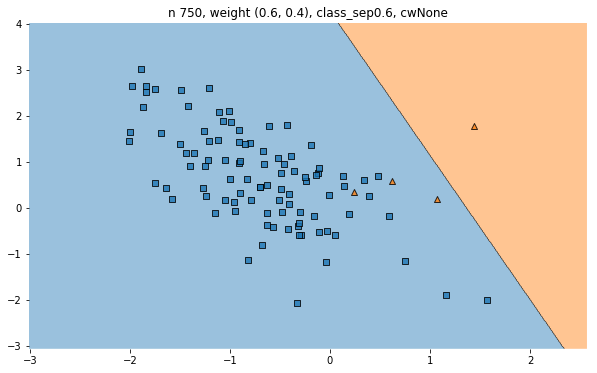

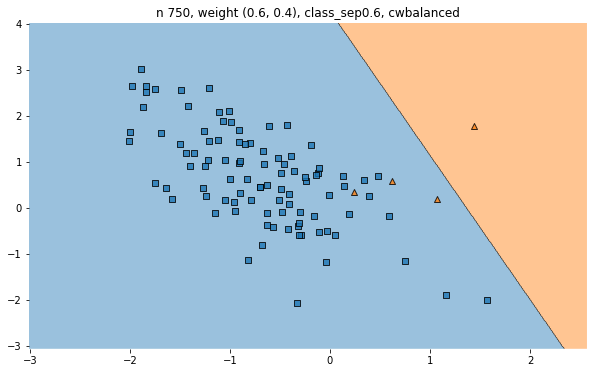

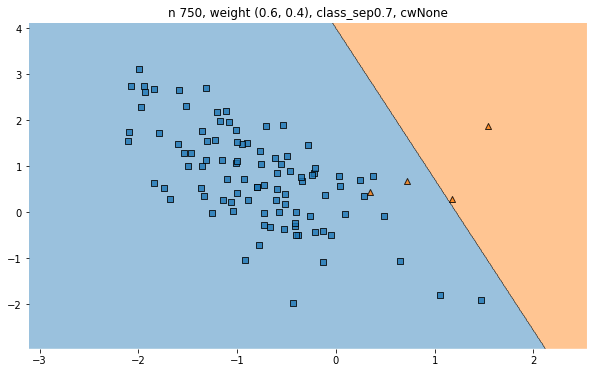

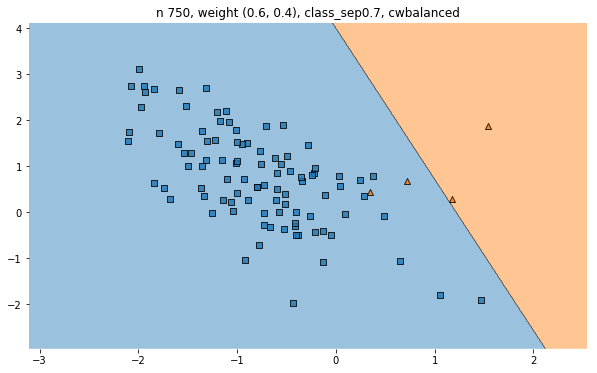

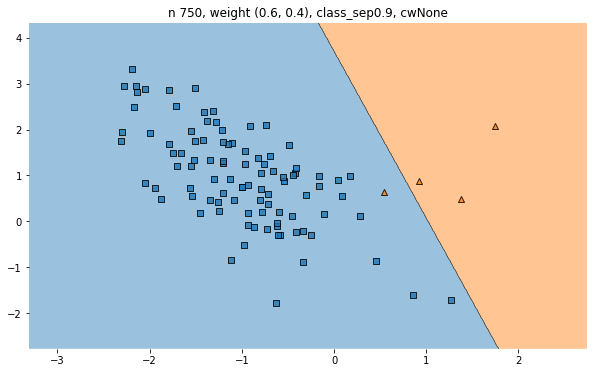

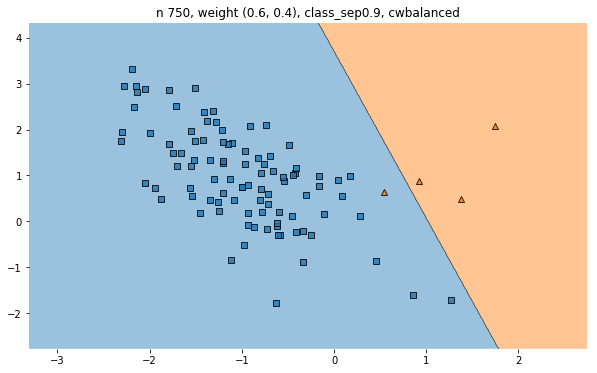

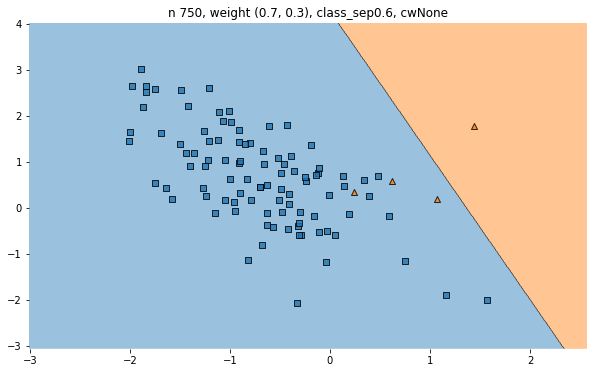

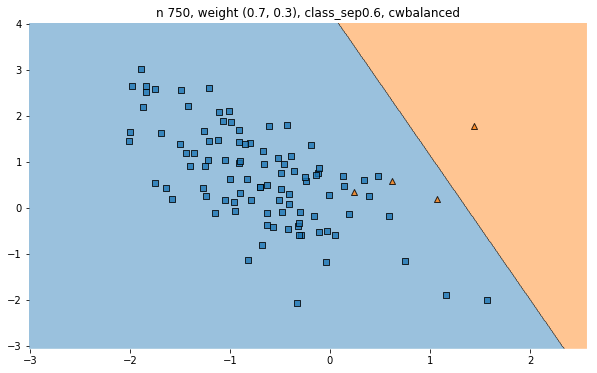

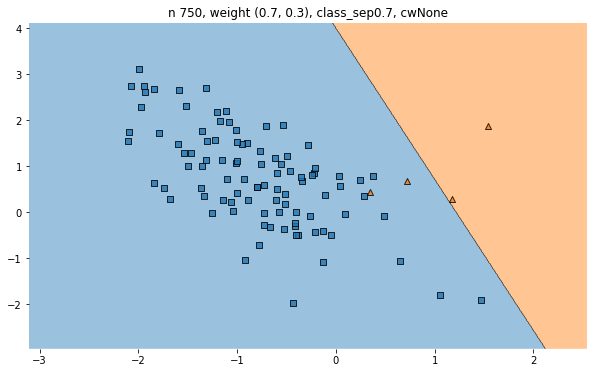

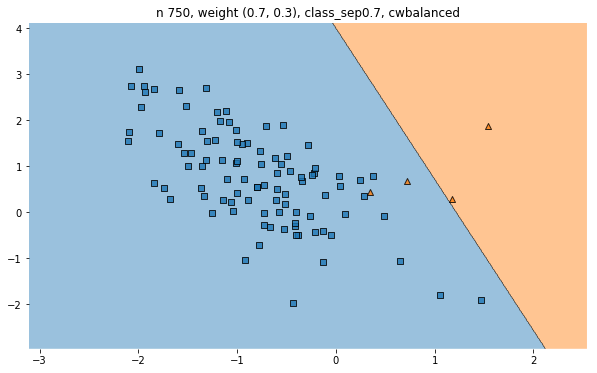

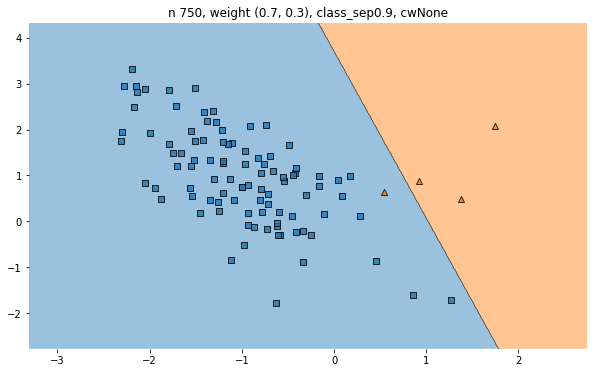

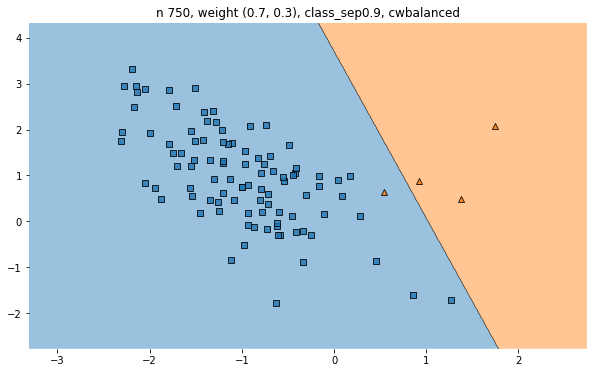

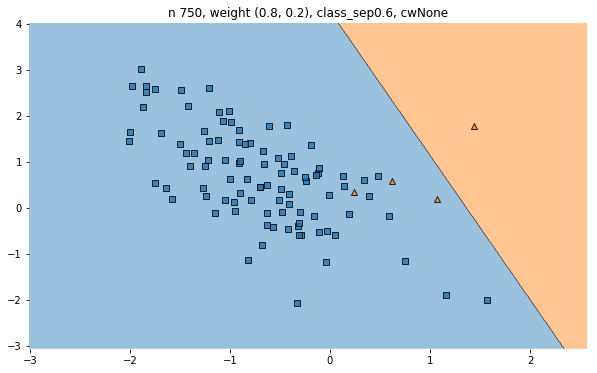

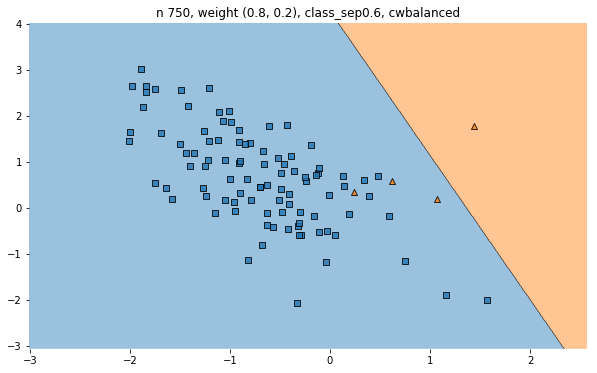

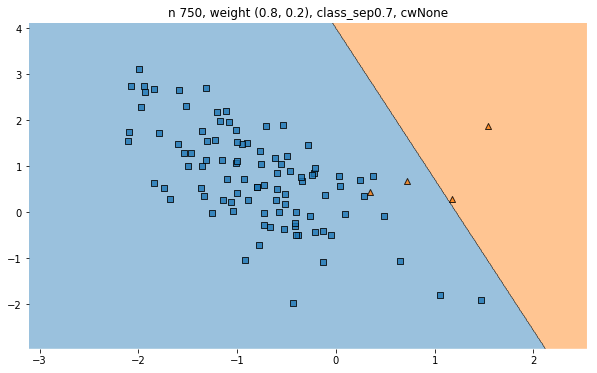

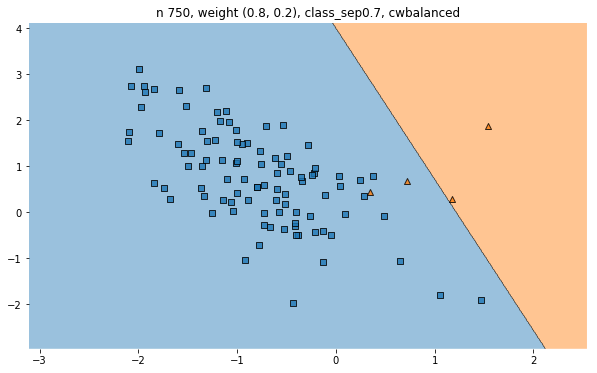

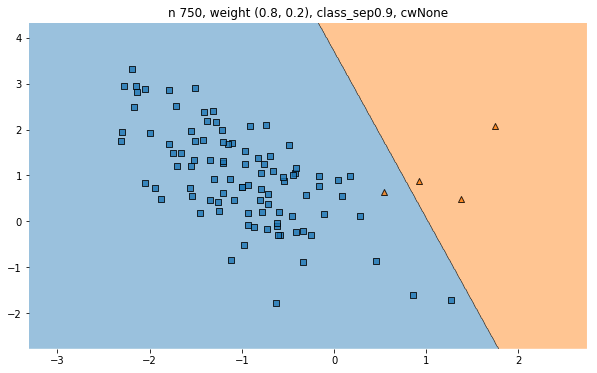

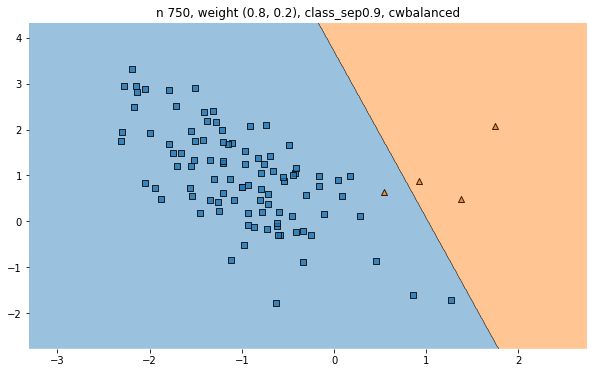

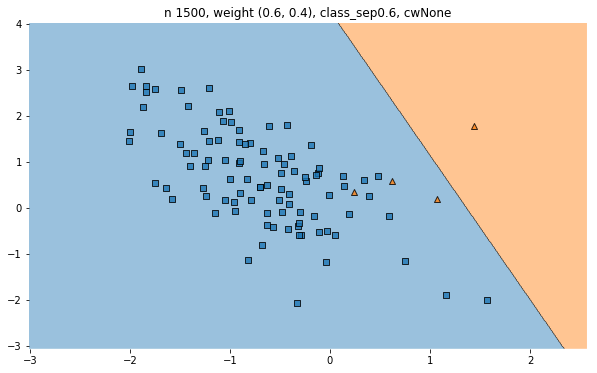

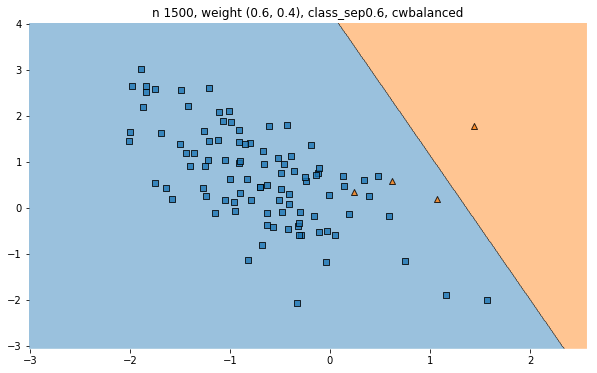

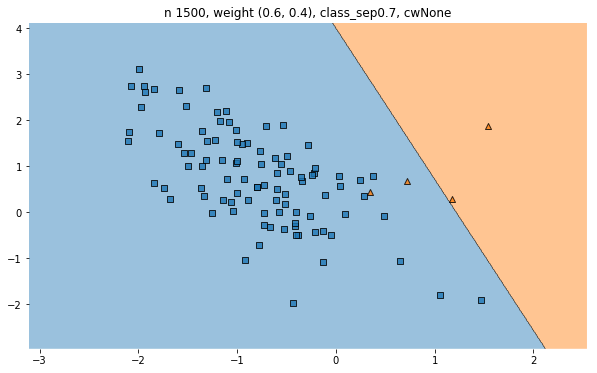

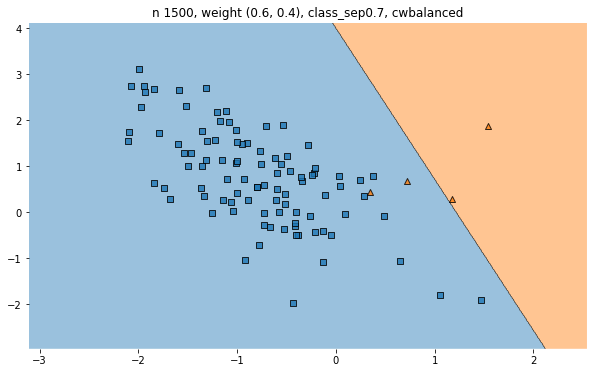

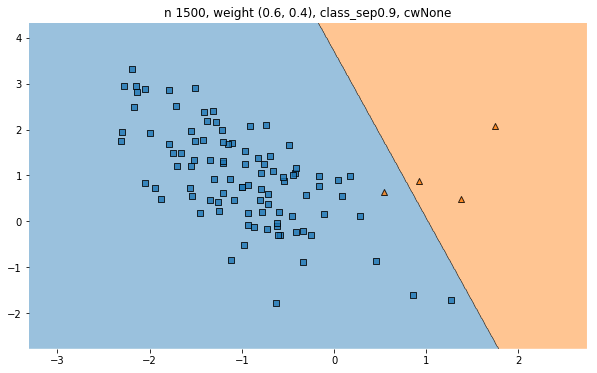

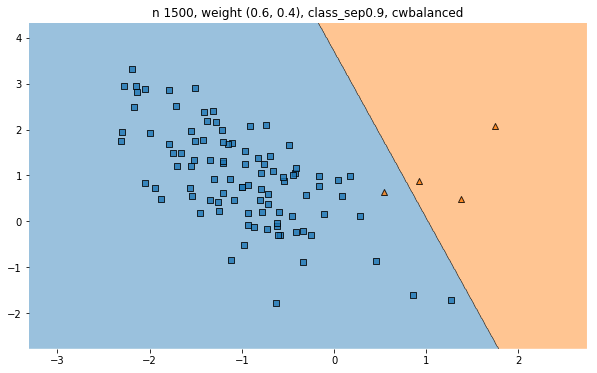

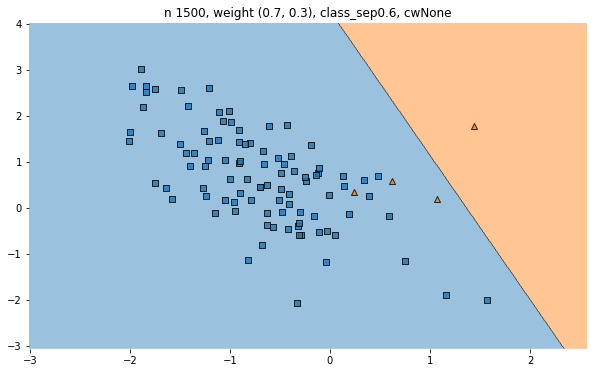

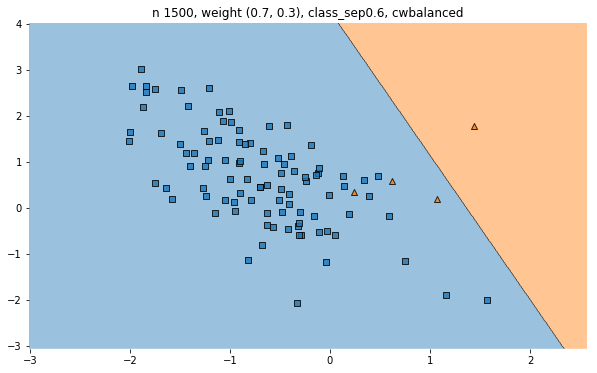

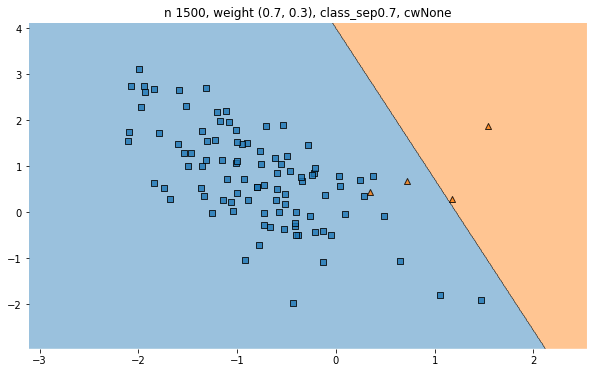

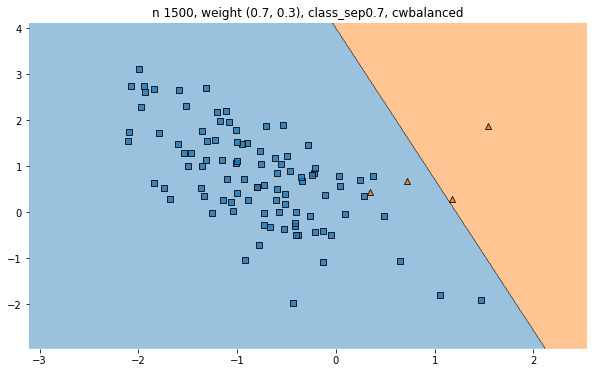

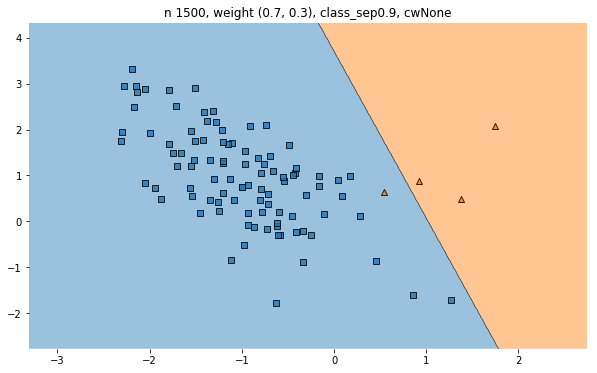

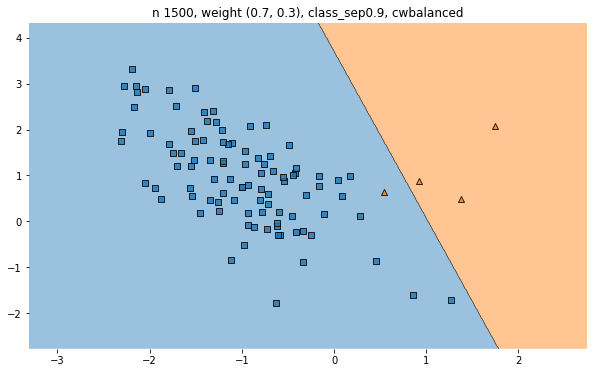

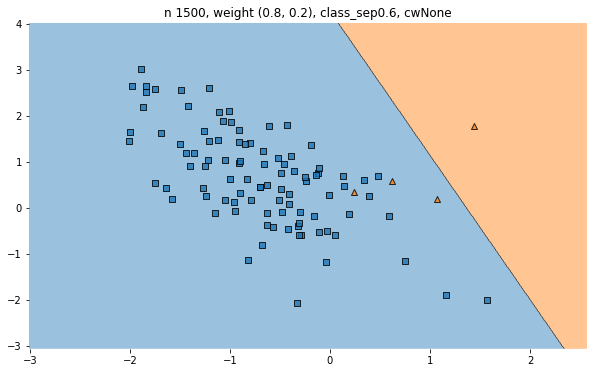

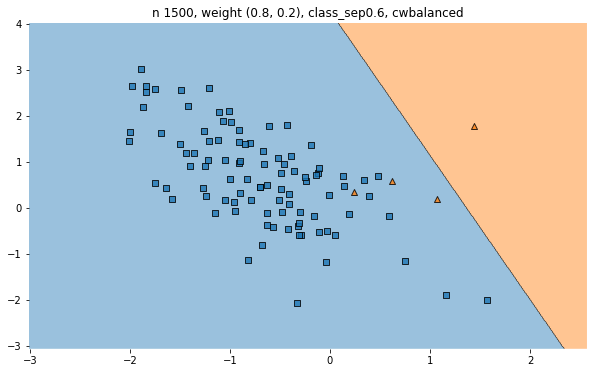

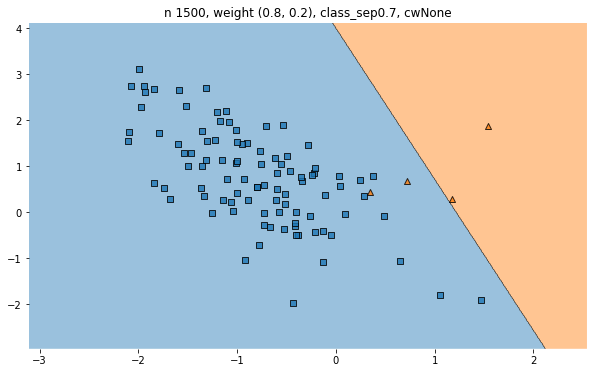

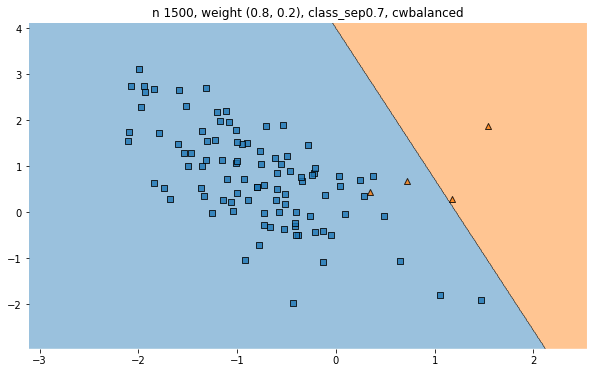

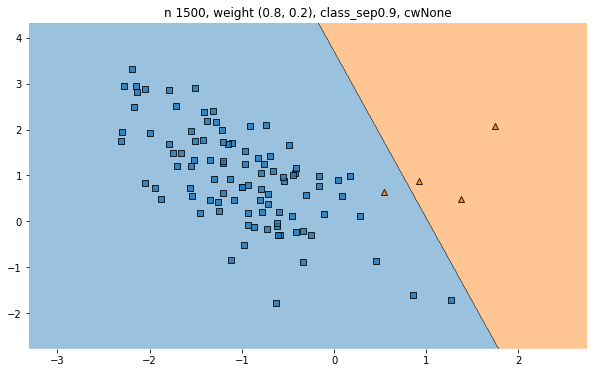

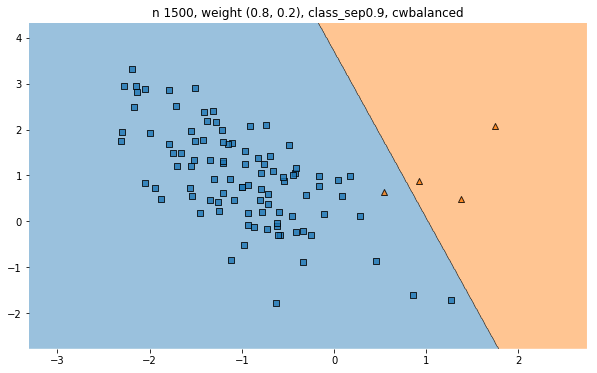

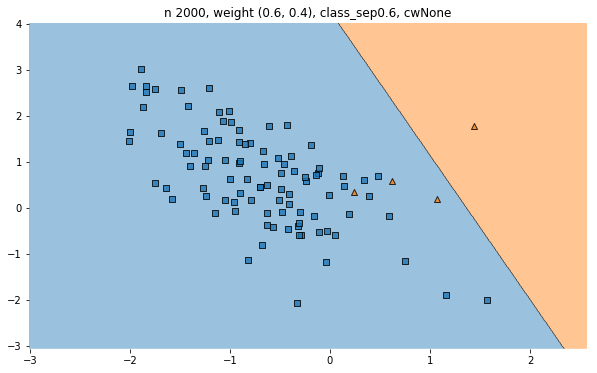

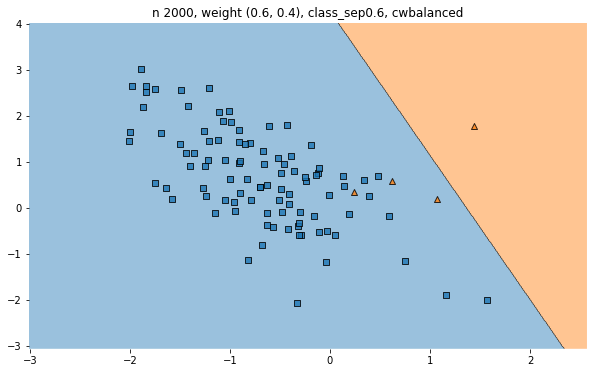

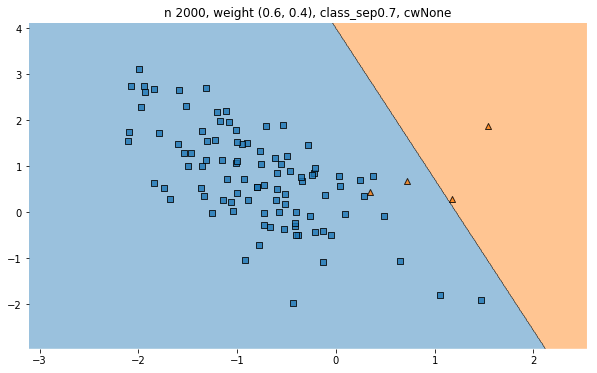

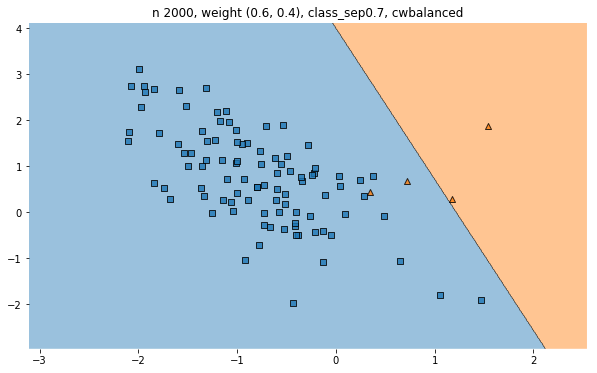

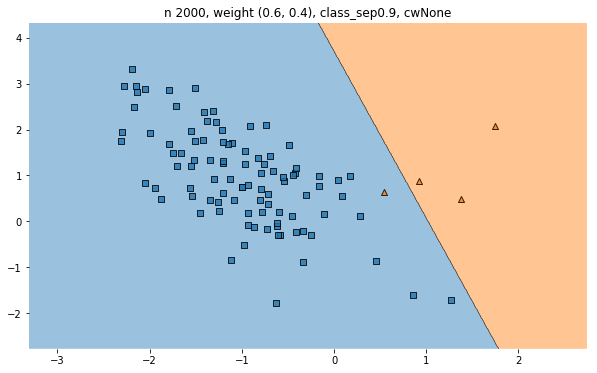

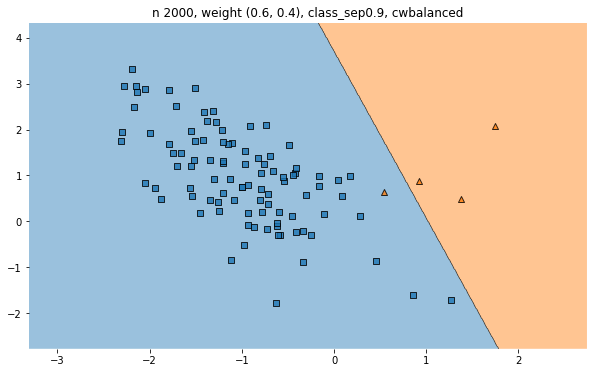

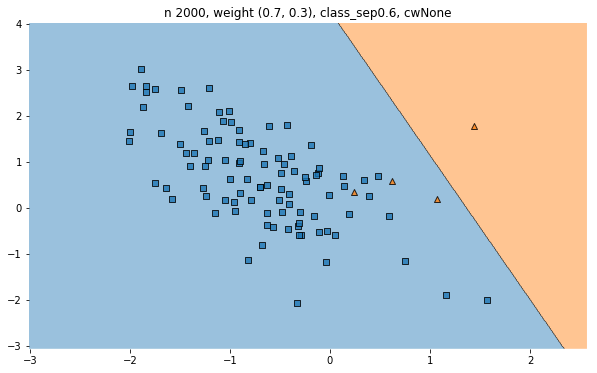

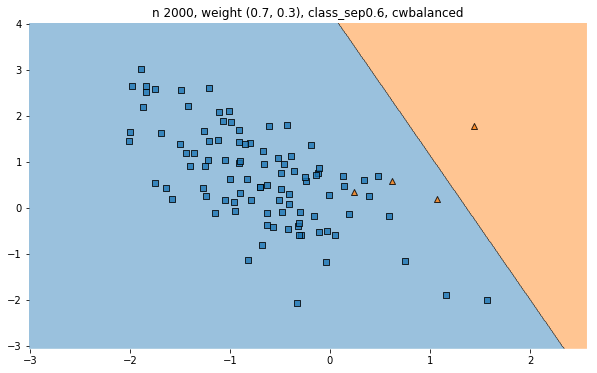

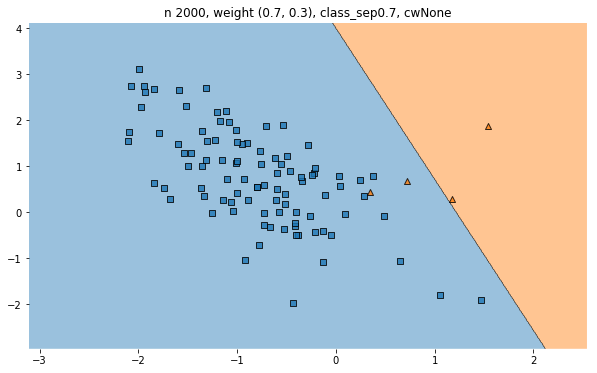

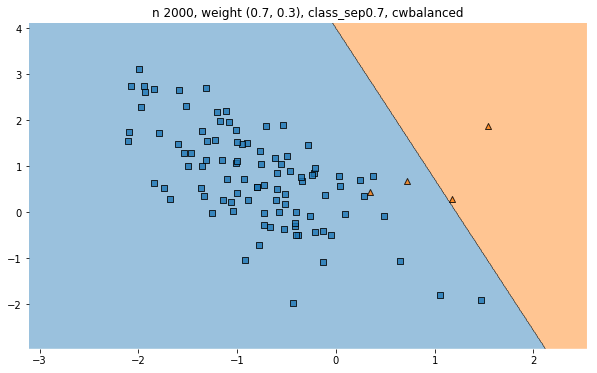

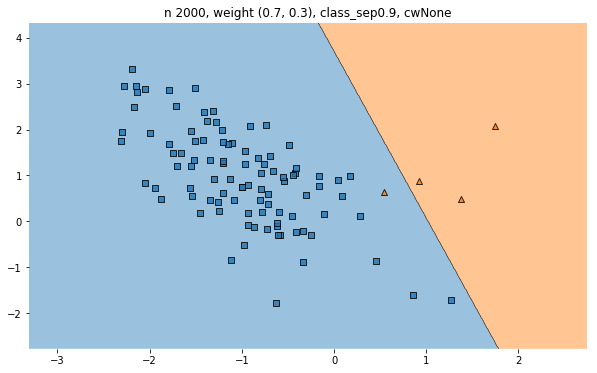

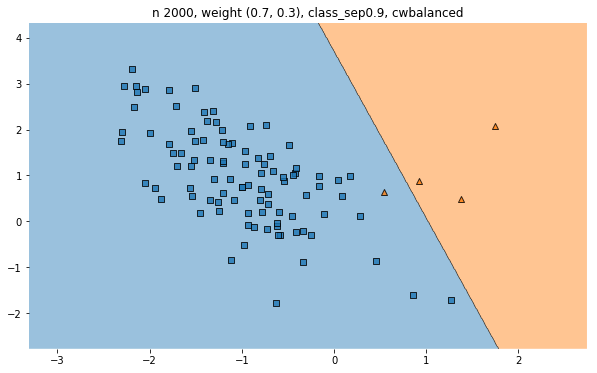

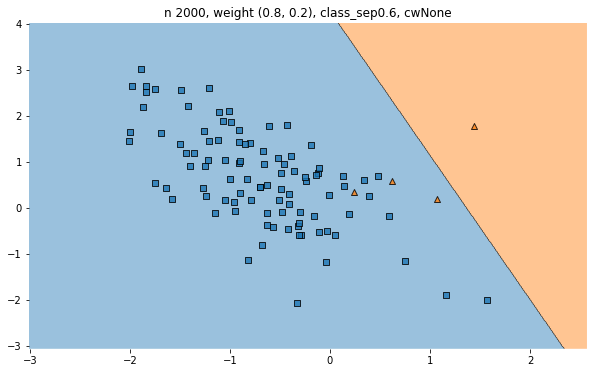

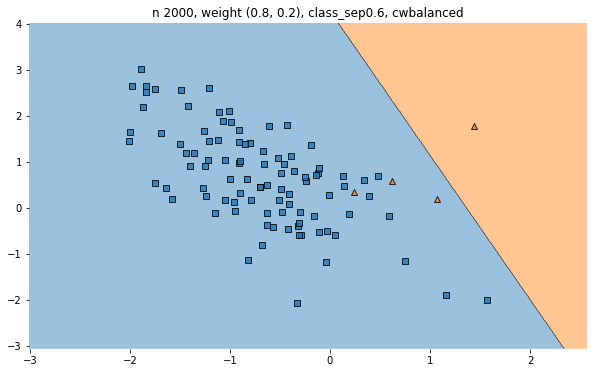

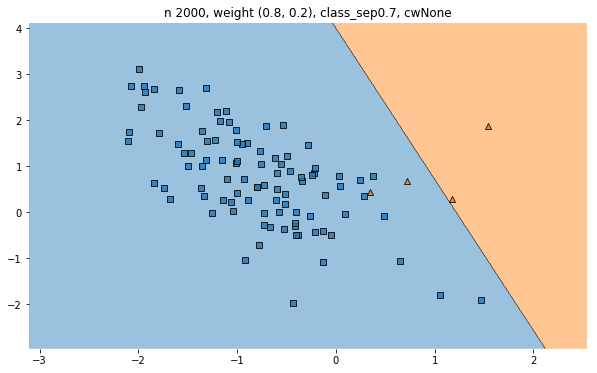

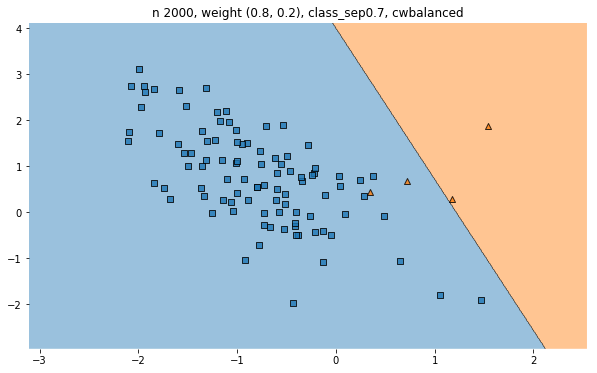

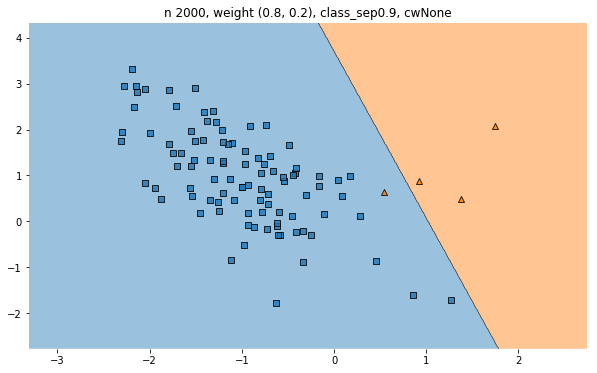

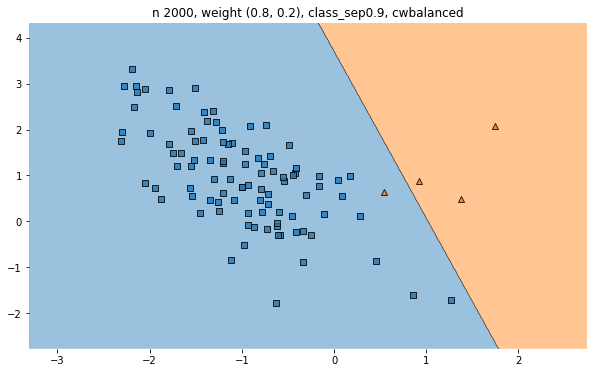

In [44]:
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#1. Generate data

# Try re-running the cell with different values for these parameters
enns=[750,1500,2000]
weightss=[(0.6,0.4),(0.7,0.3),(0.8,0.2)]
class_sepss=[0.6,0.7,0.9] 
bal=[None,'balanced']

for n in enns:
  for weight in weightss:
    for class_sep in class_sepss:
      for b in bal:
      
      
#n_samples = 1000
#weights = (0.95, 0.05)
#class_sep = 0.8

        X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
        X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
          X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
        class_weight = None
#or try class_weight='balanced'

        model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
        model.fit(X_train, y_train)


# 4. Evaluate model

        y_pred = model.predict(X_val)
        print('n ',n,' weight ',weight,'class_sep',class_sep,'class weight',b)
        print(classification_report(y_val, y_pred))
        print('accuracy', accuracy_score(y_val, y_pred))
        display(pd.DataFrame(
        confusion_matrix(y_val, y_pred), 
        columns=['Predicted Negative', 'Predicted Positive'], 
        index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

        plt.figure(figsize=(10, 6))
        plot_decision_regions(X_val, y_val, model, legend=0)
        name='n {}, weight {}, class_sep{}, cw{}'.format(n,weight,class_sep,b)
        plt.title(name)
        y_pred_proba=model.predict_proba(X_val)[:,1]
        print('roc auc',roc_auc_score(y_val,y_pred_proba),n,weight,class_sep,b)
        print('----------------------------------------------------------------------')